In [1]:
import seaborn as sns
%matplotlib inline

In [87]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


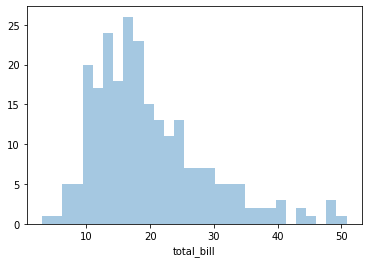

In [15]:
sns.distplot(tips['total_bill'],kde=False,bins=30)
#distplot basically a histogram

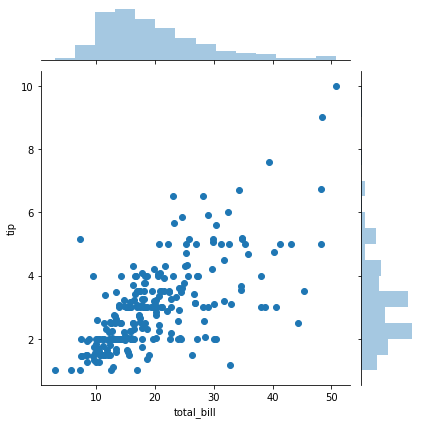

In [20]:
sns.jointplot(x='total_bill',y='tip',data=tips)
#compare two distributions
#kind=[scatter(default), hex, reg, kde]

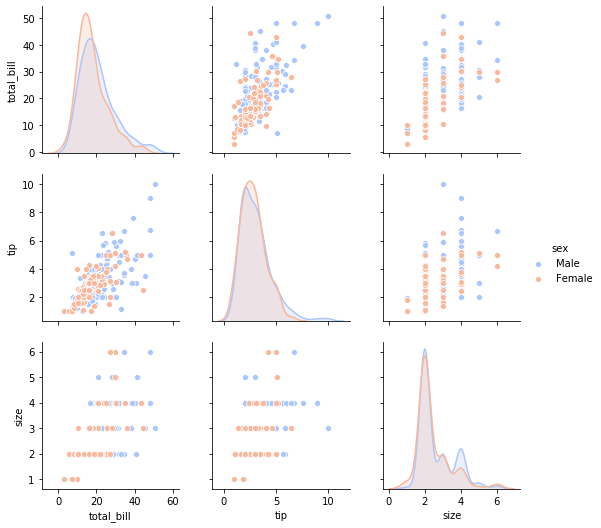

In [23]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

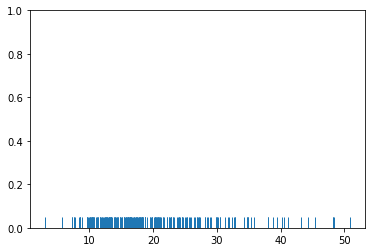

In [25]:
sns.rugplot(tips['total_bill'])

In [26]:
#KDE Kernal Density Estimation look up on Wikipedia

(0, 1)

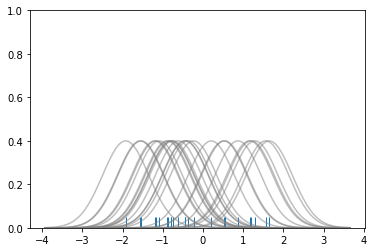

In [27]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

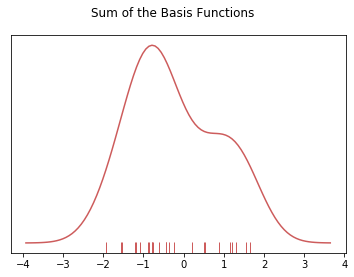

In [28]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

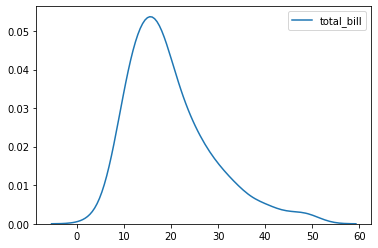

In [30]:
sns.kdeplot(tips['total_bill'])

In [31]:
# Categorical Plots

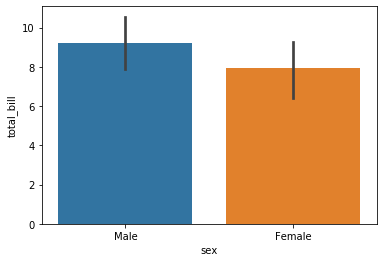

In [37]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
#x is set to a categorical column
#estimator, default is mean

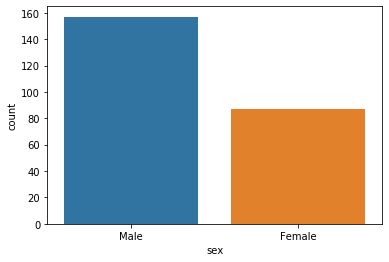

In [38]:
sns.countplot(x='sex',data=tips)

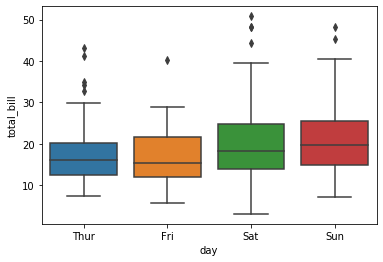

In [42]:
sns.boxplot(x='day',y='total_bill',data=tips)#,hue='smoker'

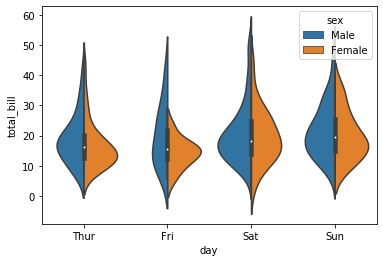

In [47]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)
#split default off

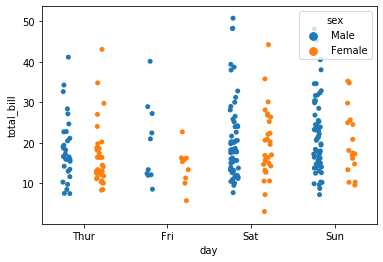

In [55]:
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True)
#jitter = False, to stack dots closer

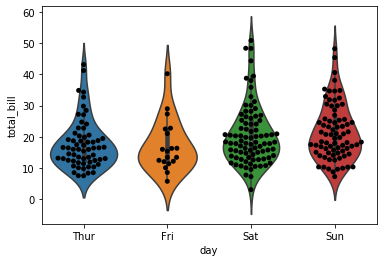

In [57]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')
#resource intensive, especially on intensive datasets

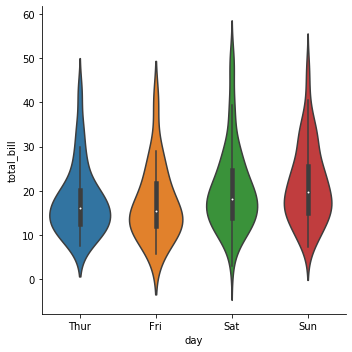

In [63]:
#sns.factorplot(x='day',y='total_bill',data=tips)
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')

In [86]:
# Matrix Plots

In [89]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [92]:
#Heatmaps need matrix form

tc = tips.corr() #correlation

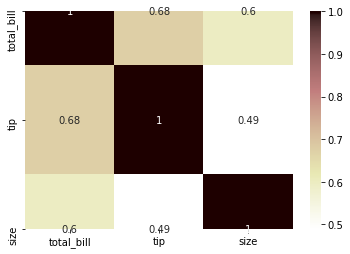

In [124]:
sns.heatmap(tc,annot=True,cmap='pink_r')

In [107]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

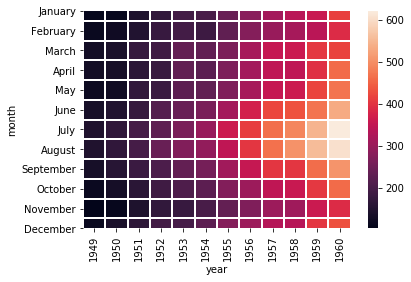

In [116]:
sns.heatmap(fp,linecolor='white',linewidths=1)

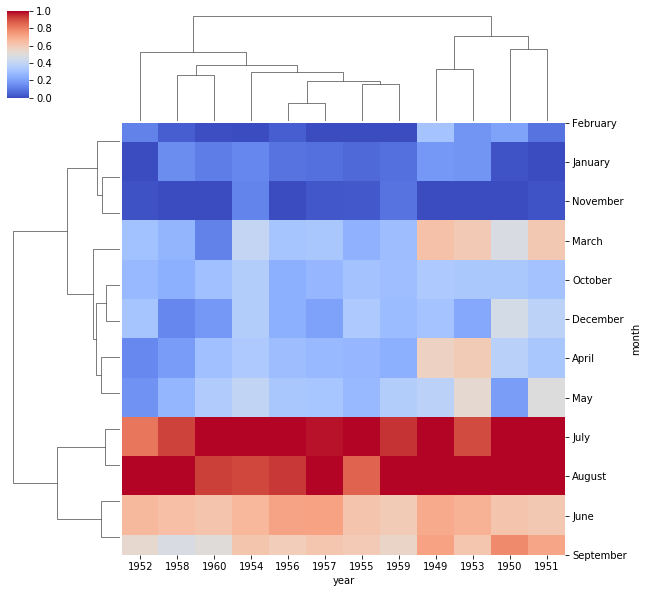

In [129]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [130]:
#Grids

In [126]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [136]:
#g = sns.PairGrid(iris)
#g.map_diag(sns.distplot)
#g.map_upper(plt.scatter)
#g.map_lower(sns.kdeplot)

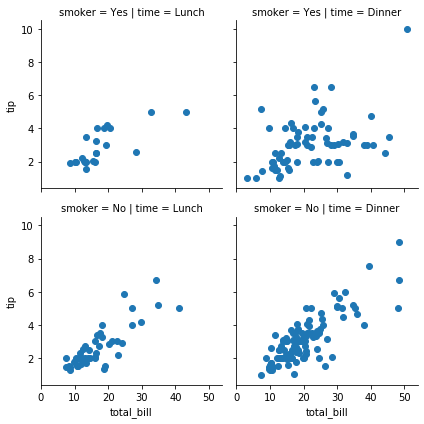

In [139]:
g = sns.FacetGrid(tips,col='time',row='smoker')
#g.map(sns.distplot,'total_bill')
g.map(plt.scatter,'total_bill','tip')